<a href="https://colab.research.google.com/github/saeedabi1/SP20_CMPE_257_Machine_Learning/blob/master/HW1_Clustering_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Clustering K-means
#Machine Leaning
#Mirsaeid Abolghasemi- 007094646

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('fam_train.csv')

In [0]:
df.head()

,location,date,zika_bool,max_temp,max_temp1,max_temp2,mean_temp,mean_temp1,mean_temp2,min_temp,...,precipitation2,wind,wind1,wind2,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp
0,Panama-San_Miguelito-Villa_Guadalupe,2016-04-11,1,34.0,34.0,34.0,29.0,29.0,29.0,25.0,...,0.00,10.0,12.0,11.0,6892.426758,0.007646,0.013383,8.499766,54.3,91.1
1,Colombia-Cundinamarca-San_Francisco,2016-06-04,1,20.0,67.0,68.0,14.0,59.0,60.0,9.0,...,0.00,8.0,6.0,7.0,97.357605,0.094968,0.094968,0.143627,291.5,666.9
2,Colombia-Caldas-Aranzazu,2016-01-09,0,73.0,72.0,72.0,67.0,68.0,67.0,61.0,...,0.00,6.0,5.0,5.0,68.086678,0.059168,2.129994,0.594266,291.5,666.9
3,Colombia-Tolima-Cajamarca,2016-06-18,1,31.0,29.0,28.0,25.0,25.0,23.0,20.0,...,11.18,11.0,9.0,7.0,40.970482,0.086736,1.705709,0.082395,291.5,666.9
4,Colombia-Antioquia-Salgar,2016-01-16,1,85.0,84.0,85.0,75.0,75.0,76.0,64.0,...,0.00,5.0,4.0,7.0,85.591782,0.204962,4.892247,0.206306,291.5,666.9


In [0]:
df.describe()

,zika_bool,max_temp,max_temp1,max_temp2,mean_temp,mean_temp1,mean_temp2,min_temp,min_temp1,min_temp2,...,precipitation2,wind,wind1,wind2,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp
count,849.000000,849.00000,849.000000,849.000000,849.000000,849.000000,849.000000,849.00000,849.000000,849.000000,...,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.828033,54.89258,53.602167,50.971118,48.164064,47.192905,44.455897,41.54490,40.771095,37.934111,...,4.131858,7.357138,8.076890,8.449164,1631.817056,0.343851,9.742860,2.409624,1150.473498,1462.164075
std,0.377574,26.75875,27.132715,25.875634,25.031131,25.545121,24.092395,23.28822,23.849323,22.431187,...,14.479220,4.552783,4.754655,4.989640,3709.898035,3.126678,26.826345,11.982446,3836.174535,3792.571697
min,0.000000,9.00000,3.000000,0.000000,3.000000,0.000000,0.000000,0.00000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.026156,0.000007,0.000007,0.000002,8.700000,18.800000
25%,1.000000,31.00000,31.000000,31.000000,27.000000,27.000000,26.000000,23.00000,23.000000,21.000000,...,0.000000,4.240000,5.000000,5.000000,31.617344,0.012275,0.649641,0.103381,99.300000,184.800000
50%,1.000000,42.05000,35.000000,35.000000,35.100000,30.000000,30.000000,28.15000,26.000000,25.000000,...,0.000000,6.000000,7.000000,7.000000,113.248444,0.090046,3.506601,0.394269,291.500000,666.900000
75%,1.000000,84.00000,85.000000,80.000000,74.000000,74.000000,70.000000,64.45000,64.000000,61.000000,...,1.190000,9.000000,10.000000,10.000000,720.173584,0.251017,9.563564,1.268572,291.500000,666.900000
max,1.000000,99.00000,99.000000,97.000000,90.000000,92.000000,88.000000,82.00000,83.000000,84.000000,...,150.880000,27.000000,33.000000,26.000000,24970.132812,89.839867,495.145246,251.468892,18120.700000,18120.700000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 27 columns):
location              849 non-null object
date                  849 non-null object
zika_bool             849 non-null int64
max_temp              849 non-null float64
max_temp1             849 non-null float64
max_temp2             849 non-null float64
mean_temp             849 non-null float64
mean_temp1            849 non-null float64
mean_temp2            849 non-null float64
min_temp              849 non-null float64
min_temp1             849 non-null float64
min_temp2             849 non-null float64
dew_point             849 non-null float64
dew_point1            849 non-null float64
dew_point2            849 non-null float64
precipitation         849 non-null float64
precipitation1        849 non-null float64
precipitation2        849 non-null float64
wind                  849 non-null float64
wind1                 849 non-null float64
wind2                 849 non-null floa

In [0]:
# drop columns that are correlated with other columns
df = df.drop(['max_temp','max_temp1','max_temp2', 'mean_temp1','mean_temp2','min_temp','min_temp1','min_temp2'],axis=1)  
df = df.drop(['wind1','wind2','precipitation1', 'precipitation2','dew_point1','dew_point2'],axis=1)

In [0]:
# create country column based on location
df['country'] = df['location']
df['country'] = df['country'].astype(str)
df['country'] = df['country'].apply(lambda x: pd.Series(x.split('-')))
df.country.unique()

array(['Panama', 'Colombia', 'Dominican_Republic', 'United_States',
       'Haiti', 'Guatemala', 'Ecuador', 'Nicaragua', 'Argentina',
       'United_States_Virgin_Islands', 'Brazil', 'Mexico', 'El_Salvador'],
      dtype=object)

In [0]:
df.head()

,location,date,zika_bool,mean_temp,dew_point,precipitation,wind,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp,country
0,Panama-San_Miguelito-Villa_Guadalupe,2016-04-11,1,29.0,21.0,0.0,10.0,6892.426758,0.007646,0.013383,8.499766,54.3,91.1,Panama
1,Colombia-Cundinamarca-San_Francisco,2016-06-04,1,14.0,9.0,0.0,8.0,97.357605,0.094968,0.094968,0.143627,291.5,666.9,Colombia
2,Colombia-Caldas-Aranzazu,2016-01-09,0,67.0,56.0,0.0,6.0,68.086678,0.059168,2.129994,0.594266,291.5,666.9,Colombia
3,Colombia-Tolima-Cajamarca,2016-06-18,1,25.0,18.0,0.0,11.0,40.970482,0.086736,1.705709,0.082395,291.5,666.9,Colombia
4,Colombia-Antioquia-Salgar,2016-01-16,1,75.0,57.0,0.0,5.0,85.591782,0.204962,4.892247,0.206306,291.5,666.9,Colombia


In [0]:
# make country column numerical
from sklearn import preprocessing
lb_make = preprocessing.LabelEncoder()
df["country"] = lb_make.fit_transform(df["country"])

In [0]:
# drop location, date columns
df = df.drop(['location','date'],axis=1)

In [0]:
# check correlation
df.corr()

,zika_bool,mean_temp,dew_point,precipitation,wind,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp,country
zika_bool,1.000000,-0.280907,-0.272382,0.067751,0.199600,0.034368,0.014711,0.010562,-0.097873,-0.079667,-0.090197,0.007241
mean_temp,-0.280907,1.000000,0.989205,-0.210713,-0.397493,-0.182227,0.062826,0.002512,-0.105094,0.107371,0.126596,-0.106680
dew_point,-0.272382,0.989205,1.000000,-0.200459,-0.420834,-0.173246,0.064902,-0.000797,-0.113940,0.077375,0.095296,-0.154162
precipitation,0.067751,-0.210713,-0.200459,1.000000,0.036627,-0.034265,-0.002769,0.053609,0.029162,0.023763,0.028273,-0.000327
wind,0.199600,-0.397493,-0.420834,0.036627,1.000000,-0.017676,-0.012872,0.146102,0.140336,0.040963,0.024321,0.202694
density_per_km,0.034368,-0.182227,-0.173246,-0.034265,-0.017676,1.000000,-0.045293,-0.121122,0.031715,0.015050,0.002635,0.148768
airport_dist_any,0.014711,0.062826,0.064902,-0.002769,-0.012872,-0.045293,1.000000,0.184589,0.287356,-0.017501,-0.016182,0.008037
airport_dist_large,0.010562,0.002512,-0.000797,0.053609,0.146102,-0.121122,0.184589,1.000000,0.722529,-0.062804,-0.054955,-0.187117
mosquito_dist,-0.097873,-0.105094,-0.113940,0.029162,0.140336,0.031715,0.287356,0.722529,1.000000,0.110679,0.105124,0.091327
gdp,-0.079667,0.107371,0.077375,0.023763,0.040963,0.015050,-0.017501,-0.062804,0.110679,1.000000,0.997781,0.621112


In [0]:
# I do not see good correlations accept between 'airport_dist_large','mosquito_dist'. 
# I will try to predict zika_bool(zika disease) from this dataset.

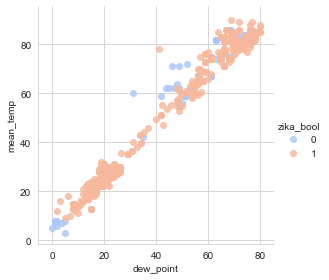

In [0]:
# plot scatterplot between 'airport_dist_large' and 'mosquito_dist' . 
# Let's try to predict these 2 clusters for zika prediction
sns.set_style('whitegrid')
sns.lmplot('dew_point','mean_temp',data=df, hue='zika_bool',
           palette='coolwarm',height=4,aspect=1,fit_reg=False)

In [0]:
df.head()

,zika_bool,mean_temp,dew_point,precipitation,wind,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp,country
0,1,29.0,21.0,0.0,10.0,6892.426758,0.007646,0.013383,8.499766,54.3,91.1,10
1,1,14.0,9.0,0.0,8.0,97.357605,0.094968,0.094968,0.143627,291.5,666.9,2
2,0,67.0,56.0,0.0,6.0,68.086678,0.059168,2.129994,0.594266,291.5,666.9,2
3,1,25.0,18.0,0.0,11.0,40.970482,0.086736,1.705709,0.082395,291.5,666.9,2
4,1,75.0,57.0,0.0,5.0,85.591782,0.204962,4.892247,0.206306,291.5,666.9,2


/Users/mirsaeidabolghasemi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mirsaeidabolghasemi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


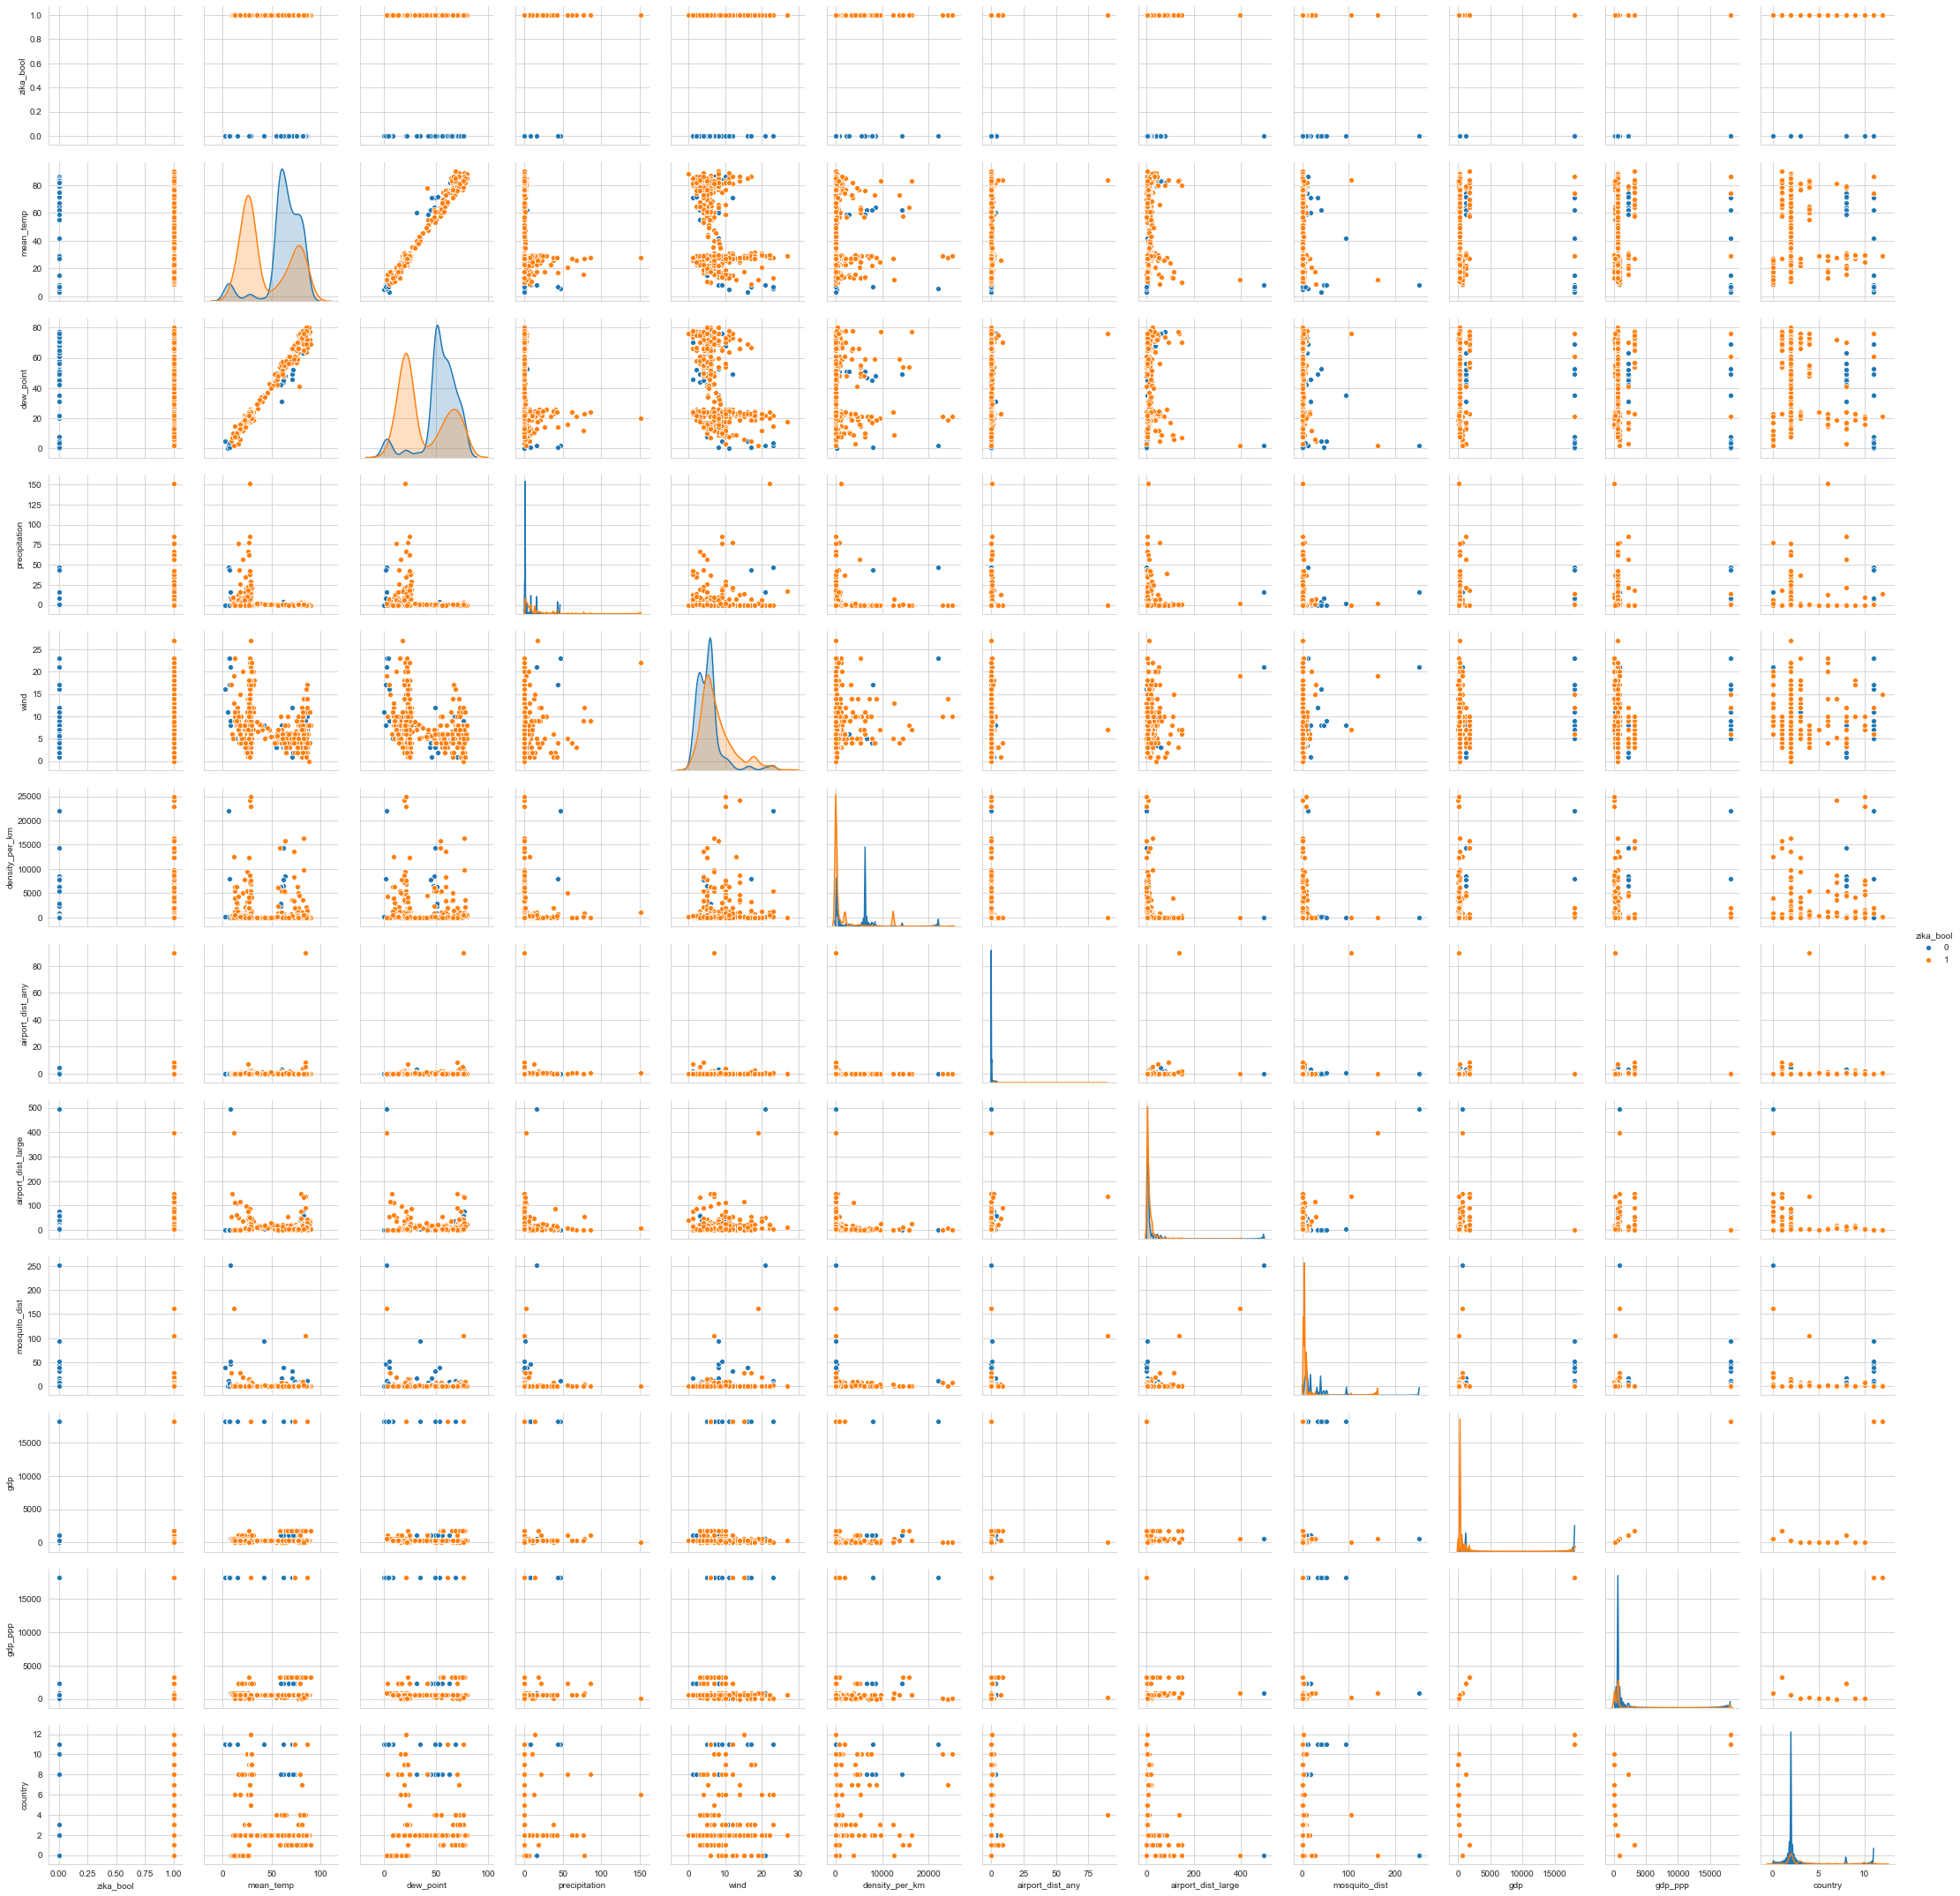

In [0]:
# check other correlations between features visually
g = sns.pairplot(df, hue='zika_bool')

In [0]:
# scaling dataset
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
df_no_zika_label = df.drop('zika_bool',axis=1)
scaler.fit(df_no_zika_label)
scaled_features = scaler.fit_transform(df_no_zika_label)

In [0]:
df_feat = pd.DataFrame(scaled_features,columns=df_no_zika_label.columns)
df_feat.head()

,mean_temp,dew_point,precipitation,wind,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp,country
0,-0.766060,-0.864976,-0.25075,0.580836,1.418829,-0.107591,-0.362897,0.508555,-0.285915,-0.361726,2.432128
1,-1.365667,-1.387631,-0.25075,0.141285,-0.413856,-0.079646,-0.359854,-0.189221,-0.224046,-0.209814,-0.488490
2,0.752944,0.659434,-0.25075,-0.298265,-0.421751,-0.091103,-0.283950,-0.151591,-0.224046,-0.209814,-0.488490
3,-0.925956,-0.995640,-0.25075,0.800611,-0.429064,-0.082281,-0.299776,-0.194334,-0.224046,-0.209814,-0.488490
4,1.072734,0.702989,-0.25075,-0.518041,-0.417029,-0.044447,-0.180922,-0.183987,-0.224046,-0.209814,-0.488490


In [0]:
# I will not divide dataset. It is small and our goal to predict clusters on entire dataset. 
X = df_feat

In [0]:
y = df['zika_bool']

In [0]:
# try K-Means

In [0]:
from sklearn.cluster import KMeans

In [0]:
# we want to divide our dataset to 2 clusters: zika and not zika
kmeans = KMeans(n_clusters=3, init='k-means++')

In [0]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# check centroids
kmeans.cluster_centers_

array([[-0.90305198, -0.89517944,  0.18499519,  0.38969303,  0.1604756 ,
        -0.03958993,  0.02338266,  0.04226186, -0.24339527, -0.26347765,
         0.05486125],
       [ 0.97364774,  0.97836748, -0.21722442, -0.46399341, -0.19211779,
         0.05426348,  0.0119019 , -0.09995438, -0.20343933, -0.17743841,
        -0.36551631],
       [ 0.40292947,  0.27700389,  0.08213017,  0.23241163,  0.10539517,
        -0.08964957, -0.35440242,  0.48523392,  4.42634438,  4.3950007 ,
         2.8150142 ]])

In [0]:
# predict and save resulting clusters in our dataset 
df['cluster_kmeans'] = kmeans.predict(X)

In [0]:
df.head()

,zika_bool,mean_temp,dew_point,precipitation,wind,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp,country,cluster_kmeans
0,1,29.0,21.0,0.0,10.0,6892.426758,0.007646,0.013383,8.499766,54.3,91.1,10,0
1,1,14.0,9.0,0.0,8.0,97.357605,0.094968,0.094968,0.143627,291.5,666.9,2,0
2,0,67.0,56.0,0.0,6.0,68.086678,0.059168,2.129994,0.594266,291.5,666.9,2,1
3,1,25.0,18.0,0.0,11.0,40.970482,0.086736,1.705709,0.082395,291.5,666.9,2,0
4,1,75.0,57.0,0.0,5.0,85.591782,0.204962,4.892247,0.206306,291.5,666.9,2,1


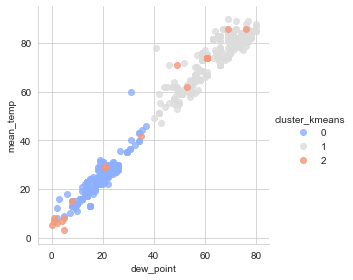

In [0]:
# check predicted clusters visually
sns.set_style('whitegrid')
sns.lmplot('dew_point','mean_temp',data=df, hue='cluster_kmeans',
           palette='coolwarm',height=4,aspect=1,fit_reg=False)

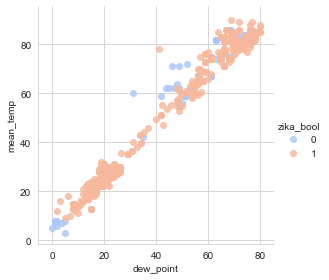

In [0]:
# original observation
sns.set_style('whitegrid')
sns.lmplot('dew_point','mean_temp',data=df, hue='zika_bool',
           palette='coolwarm',height=4,aspect=1,fit_reg=False)

In [0]:
# check silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.3919993830642107

In [0]:
# check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(df['zika_bool'], df['cluster_kmeans'])

0.30153121319199055

In [0]:
# check statistics
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['zika_bool'], kmeans.labels_))
print(classification_report(df['zika_bool'], kmeans.labels_))

[[  5 129  12]
 [423 251  29]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.01      0.03      0.02       146
           1       0.66      0.36      0.46       703
           2       0.00      0.00      0.00         0

    accuracy                           0.30       849
   macro avg       0.22      0.13      0.16       849
weighted avg       0.55      0.30      0.39       849



/Users/mirsaeidabolghasemi/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
#another approch:

In [0]:
'''
#skipped
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
df = pd.read_csv('fam_train.csv')
df = df.drop(['max_temp','max_temp1','max_temp2', 'mean_temp1','mean_temp2','min_temp1','min_temp2'],axis=1)  
df = df.drop(['wind1','wind2','precipitation1', 'precipitation2','dew_point1','dew_point2'],axis=1) 
from sklearn import preprocessing
lb_make = preprocessing.LabelEncoder()
df["date"] = lb_make.fit_transform(df["date"])
df["location"] = lb_make.fit_transform(df["location"])
'''

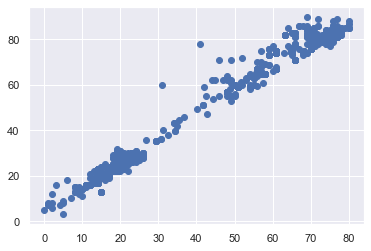

In [0]:
df1 = df[['dew_point','mean_temp']]
X = df1.values
plt.scatter(X[:,0], X[:,1])

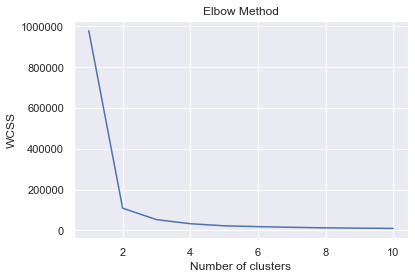

In [0]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

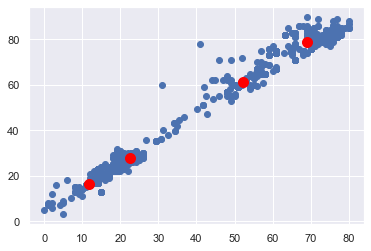

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

# Another algorithm 

In [0]:
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
#import seaborn as sns
#sns.set()

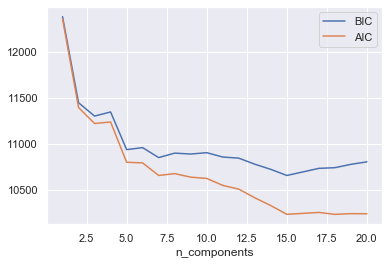

In [0]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [0]:
gmm = GaussianMixture(n_components=4)
df1 = df[['dew_point','mean_temp']]
X = df1.values
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

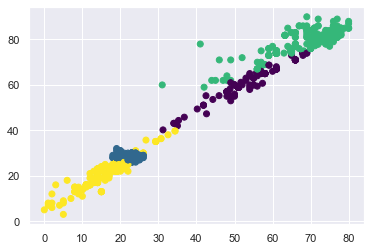

In [0]:
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis');

In [0]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[55.80209176 63.23779108]
 [22.64794257 28.03840998]
 [67.33410968 78.27012293]
 [16.34502471 21.23052796]]


[[[86.96042315 79.06791988]
  [79.06791988 74.38940477]]

 [[ 3.33956519 -0.75576977]
  [-0.75576977  1.45456758]]

 [[65.88418499 38.56282955]
  [38.56282955 33.69185215]]

 [[42.59705416 41.91571661]
  [41.91571661 47.42588823]]]
